In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np

In [14]:
def load_whole_dataset(fname, sep='\t'):
    data = []
    cnt = 0
    with open(fname) as f:
        for line in f:
            items = line.strip().split(sep)
            if cnt == 0:
                keys = items
                cnt += 1
                continue
            data.append(items)
    return data, keys

In [15]:
def plot_diff_hist(data):
    subj_idxs = [int(x[1]) for x in data]

    verb_idxs = [int(x[2]) for x in data]

    diff = [verb_idx - subj_idx
            for verb_idx, subj_idx in zip(verb_idxs, subj_idxs)]

    plt.xticks(range(41), ['' if x % 5 else x for x in range(41)])
    plt.hist(diff, bins=20, align='left', range=(0,20), normed=True, rwidth=0.5)
    plt.show()

In [16]:
def plot_diff_hist(data):
#     verb_poss = [x[3] for x in data]
    diff = [None, None]
    for i,verb_pos in enumerate(['VBZ', 'VBP']):
        subj_idxs = [int(x[1]) for x in data if x[3] == verb_pos]
        verb_idxs = [int(x[2]) for x in data if x[3] == verb_pos]

        diff[i] = [verb_idx - subj_idx
                for verb_idx, subj_idx in zip(verb_idxs, subj_idxs)]

    plt.xticks(range(41), ['' if x % 5 else x for x in range(41)])
    plt.hist(diff, bins=20, align='left', range=(0,20), rwidth=0.8)
    plt.show()

In [17]:
fname = 'data/wiki-train.txt'

In [18]:
data_train, keys = load_whole_dataset(fname)

In [19]:
data_train[0][3]

'VBZ'

In [20]:
keys

['sentence', 'subj_idx', 'verb_idx', 'verb_pos', 'verb', 'inflected_verb']

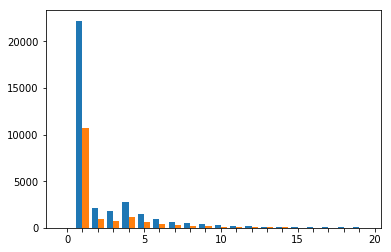

In [21]:
plot_diff_hist(data_train) 

In [22]:
fname = 'data/wiki-dev.txt'

In [23]:
data_dev, keys = load_whole_dataset(fname)

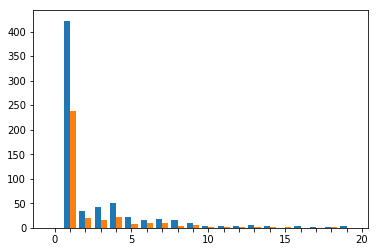

In [24]:
plot_diff_hist(data_dev)

In [38]:
sum(x[3] == 'VBP' for x in data_dev)

341

# Q2a

In [25]:
q2a_data, q2a_keys = load_whole_dataset('question2a.csv',sep=',')

In [26]:
q2a_keys

['', 'hdim', 'lookback', 'loss', 'loss_adjusted', 'lr', 'seed']

In [27]:
l = []
l.append([1,2,3])
l.append([1,2,3])
l

[[1, 2, 3], [1, 2, 3]]

In [28]:
[*zip(l, 'ab')]

[([1, 2, 3], 'a'), ([1, 2, 3], 'b')]

In [29]:
#plt.rcParams['figure.figsize'] = (8,6)

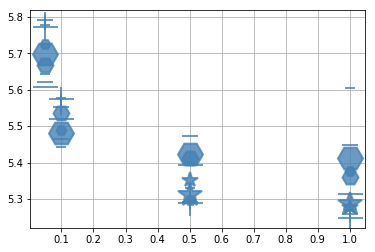

In [35]:
def plot_hyper_losses(data):
#     loss, xx, markers = [], [], []
    for hdim,shape in zip(['15', '25', '50', '100'], '_'):
        for lookback,size in zip(['0', '2', '5'], [10,16,25]): 
            filtered = filter(lambda x: x[1]==hdim and x[2]==lookback, data)
#             print(list(filtered))
#             loss.append([float(x[4]) for x in filtered])
#             xx.append([float(x[-2]) for x in filtered])
            loss = ([float(x[4]) for x in filtered])
            filtered = filter(lambda x: x[1]==hdim and x[2]==lookback, data)


            xx = ([float(x[-2]) for x in filtered])

#             print(len(xx), len(loss))
            plt.plot(xx, loss, shape, markersize=size, color='steelblue', alpha=0.8, mew=2)
    plt.grid(True)
    plt.xticks(np.arange(0.1, 1.01, 0.1))
#     plt.xscale('log')
    plt.show()
    
plot_hyper_losses(q2a_data)

# Learning curve

In [4]:
losses = [4.842770055743925,
4.842541666671183,
4.633576436967772,
4.565889004763209,
4.527051928218304,
4.49880908158899,
4.478114420169029,
4.44768033856668,
4.416948812533783,
4.419089115408261,
4.397512946688464,
4.380179328707286,
4.385566042685086,
4.364213091289827,
4.354823694260496,
4.376612136526675,
4.339827835175527,
4.343092329441356,
4.337589856894631,
4.328309673471001,
4.326579464475598,
4.314411950537779,
4.331580414917071,
4.3058197101301,
4.2978949865108955,
4.295472948889735,
4.306594276271279,
4.2936431059027775,
4.2826047139646,
4.278127926970142,
4.281363067736914,
4.273823644591111,
4.314112179135553,
4.26755103334105,
4.272810068910643,
4.276821712554971,
4.261488655099078,
4.2670372380817,
4.261839919425519,
4.255654250752828]

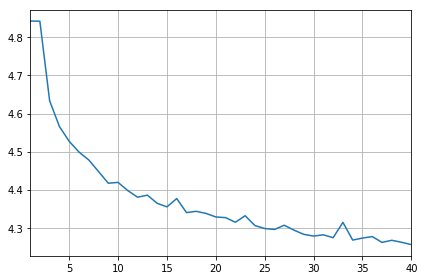

In [40]:
plt.plot(np.arange(1,41), losses)
plt.grid()
plt.xlim(1,40)
plt.tight_layout()
plt.savefig("q2b_losses.pdf")
plt.show()

